In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style = 'whitegrid')
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15,4)
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('data/4) 9월 개질기 운전 밴더_sample.csv', encoding = 'cp949')
df.head()

,바인딩시간,장비번호,장비날짜,장비시간,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,W_Desulfur,W_CO,W_Backflow,W_P301_F_Cnt,S_Level_Con,S_Desulfur,S_CO,S_Backflow,S_P301_F_Cnt,S_P203OL
0,20190901010002,10965,2019-09-01,0.040498,0,2,723,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,False
1,20190901010103,10965,2019-09-01,0.041204,0,2,724,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,False
2,20190901010204,10965,2019-09-01,0.041910,0,2,724,59.3,4990,110.0,...,False,False,False,False,False,False,False,False,False,False
3,20190901010305,10965,2019-09-01,0.042627,0,2,723,59.3,4990,110.1,...,False,False,False,False,False,False,False,False,False,False
4,20190901010401,10965,2019-09-01,0.043275,0,2,724,59.3,4990,109.8,...,False,False,False,False,False,False,False,False,False,False


In [3]:
import datetime 

for i in range(df['장비시간'].count()):
    df['장비시간'][i] = str(datetime.timedelta(df['장비시간'][i])) 
    
df['장비시간'].head(10)

0    0:58:19
1    0:59:20
2    1:00:21
3    1:01:23
4    1:02:19
5    1:03:20
6    1:04:21
7    1:05:22
8    1:06:18
9    1:07:20
Name: 장비시간, dtype: object

In [4]:
## 장비날짜와 장비시간을 합쳐서 새로운 컬럼 equit_dt를 만들자 
df['equip_dt'] = df['장비날짜'] + ' ' + df['장비시간']
df['equip_dt'] = pd.to_datetime(df['equip_dt'])
df['equip_dt'].head()

0   2019-09-01 00:58:19
1   2019-09-01 00:59:20
2   2019-09-01 01:00:21
3   2019-09-01 01:01:23
4   2019-09-01 01:02:19
Name: equip_dt, dtype: datetime64[ns]

In [5]:
df.head()

,바인딩시간,장비번호,장비날짜,장비시간,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,W_CO,W_Backflow,W_P301_F_Cnt,S_Level_Con,S_Desulfur,S_CO,S_Backflow,S_P301_F_Cnt,S_P203OL,equip_dt
0,20190901010002,10965,2019-09-01,0:58:19,0,2,723,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,2019-09-01 00:58:19
1,20190901010103,10965,2019-09-01,0:59:20,0,2,724,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,2019-09-01 00:59:20
2,20190901010204,10965,2019-09-01,1:00:21,0,2,724,59.3,4990,110.0,...,False,False,False,False,False,False,False,False,False,2019-09-01 01:00:21
3,20190901010305,10965,2019-09-01,1:01:23,0,2,723,59.3,4990,110.1,...,False,False,False,False,False,False,False,False,False,2019-09-01 01:01:23
4,20190901010401,10965,2019-09-01,1:02:19,0,2,724,59.3,4990,109.8,...,False,False,False,False,False,False,False,False,False,2019-09-01 01:02:19


In [6]:
df['year'] = df['equip_dt'].dt.year
df['month'] = df['equip_dt'].dt.month
df['day'] = df['equip_dt'].dt.day
df['hour'] = df['equip_dt'].dt.hour
df['minute'] = df['equip_dt'].dt.minute
df['second'] = df['equip_dt'].dt.second

df.head()

,바인딩시간,장비번호,장비날짜,장비시간,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,S_Backflow,S_P301_F_Cnt,S_P203OL,equip_dt,year,month,day,hour,minute,second
0,20190901010002,10965,2019-09-01,0:58:19,0,2,723,59.3,4990,109.9,...,False,False,False,2019-09-01 00:58:19,2019,9,1,0,58,19
1,20190901010103,10965,2019-09-01,0:59:20,0,2,724,59.3,4990,109.9,...,False,False,False,2019-09-01 00:59:20,2019,9,1,0,59,20
2,20190901010204,10965,2019-09-01,1:00:21,0,2,724,59.3,4990,110.0,...,False,False,False,2019-09-01 01:00:21,2019,9,1,1,0,21
3,20190901010305,10965,2019-09-01,1:01:23,0,2,723,59.3,4990,110.1,...,False,False,False,2019-09-01 01:01:23,2019,9,1,1,1,23
4,20190901010401,10965,2019-09-01,1:02:19,0,2,724,59.3,4990,109.8,...,False,False,False,2019-09-01 01:02:19,2019,9,1,1,2,19


In [7]:
var_list = ['ACP', 'TT101', 'TT120', 'TT109', 'TT112']

In [8]:
df[var_list].describe()

,ACP,TT101,TT120,TT109,TT112
count,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000
mean,694.073141,112.709715,729.661146,183.991334,140.724492
std,172.813120,5.589800,94.731942,12.758184,12.233329
min,0.000000,97.000000,201.900000,130.800000,86.500000
25%,732.000000,112.000000,747.300000,180.000000,140.000000
50%,738.000000,112.400000,750.800000,180.200000,140.100000
75%,742.000000,112.800000,753.100000,184.600000,140.200000
max,837.000000,186.300000,826.900000,275.900000,224.500000


In [9]:
a = df[var_list].describe()
a.to_csv('output/stat_result.csv')

In [10]:
df_new = df[df['Seq'] == 4990]
df_new.shape

(38982, 167)

In [11]:
a = df_new[var_list].describe()
a.to_csv('output/stat_result2.csv')

In [12]:
df['ACP'].mean()

694.0731414580283

<AxesSubplot:>

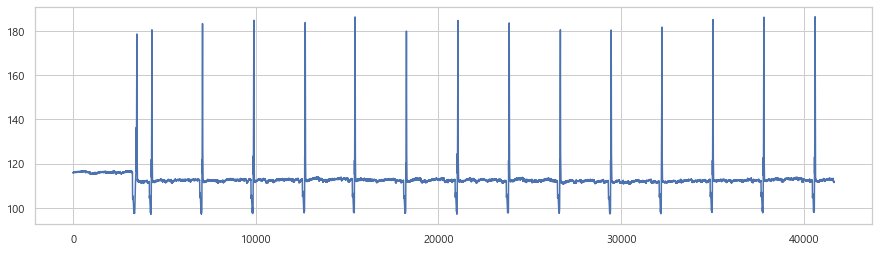

In [13]:
df['TT101'].plot()

<AxesSubplot:xlabel='day', ylabel='TT109'>

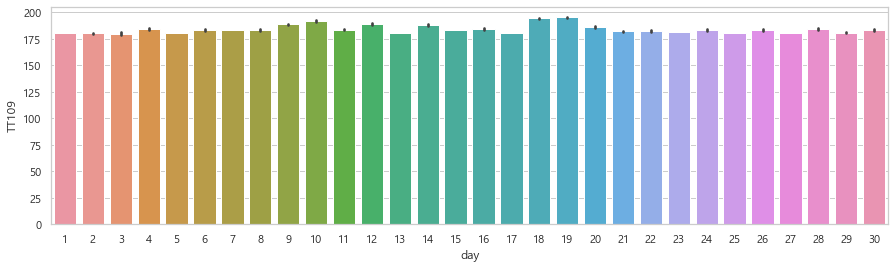

In [14]:
sns.barplot(data=df, x='day', y='TT109')

In [15]:
df.columns

Index(['바인딩시간', '장비번호', '장비날짜', '장비시간', 'Pattern', 'Load', 'ACP', 'TT Cogen',
       'Seq', 'TT117',
       ...
       'S_Backflow', 'S_P301_F_Cnt', 'S_P203OL', 'equip_dt', 'year', 'month',
       'day', 'hour', 'minute', 'second'],
      dtype='object', length=167)

In [16]:
col_list = df.columns

for i in col_list : 
    print(i)

바인딩시간
장비번호
장비날짜
장비시간
Pattern
Load
ACP
TT Cogen
Seq
TT117
TT102
TT105
TT109
TT112
TT123
TT120
TT101
TT201
TT301
TT302
TT Cold
TT Hot
TTA
PIT101
PIT_NG
PIT201
PIT301
P101_SP
P101_MF
P102_SP
P201_SP
P201_MF
P202_SP
P202_MF
P203_SP
P203_MF
P301_SP
P302_SP
P303_SP
P304_SP
H2_Leak
P101_MFC_SP
P101_MFC_MF
P102_MFC_SP
P102_MFC_MF
H2_Leak_2
Cogen
P301_MF
Stack_V
INV_V
INV_I
AC_V
Stack_I
AC_V_A
AC_V_B
AC_V_C
INV_Error
LS303_H
LS303_L
LS304_H
LS304_L
CVM
NC101
NC102
NC103
NC104
NC105
NC106
NC202
NC308
NC309
NC311
NC312
NC313
NC104_AB
NC303
NC307
Igniter
PWR_RLY
AC/DC
DC/DC
Stack_RV
S_TT101
S_TT102
S_TT109
S_TT117
S_TT120
S_TT123
S_TT301
S_TT302
S_FAN
S_PITNG
S_PIT101
S_PIT201
S_PIT301
S_OCV
S_Stack V
S_CVM
S_GRID
S_Inverter
S_Inv COMM
S_Igniter
S_Temp COM
S_NC303
S_H2Leak
S_STACK
S_P101
S_P102
S_P201
S_P202
S_P203
S_P301
S_P302
S_TTA
W_TT101
W_TT102
W_TT109
W_TT117
W_TT120
W_TT123
W_TT301
W_TT302
W_FAN
W_PITNG
W_PIT101
W_PIT201
W_PIT301
W_OCV
W_Stack V
W_CVM
W_GRID
W_Inverter
W_Inv COMM
W_Igniter

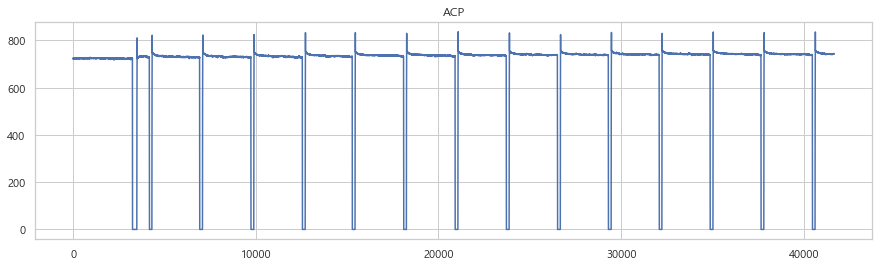

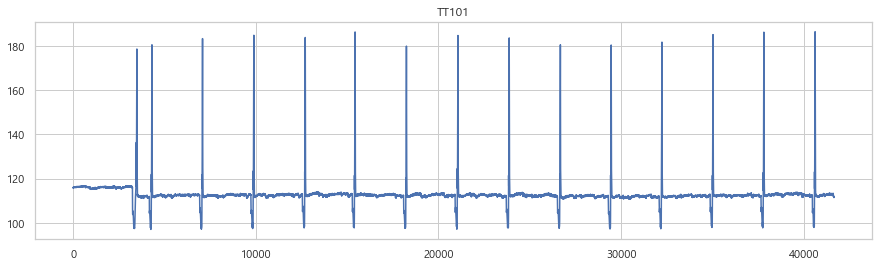

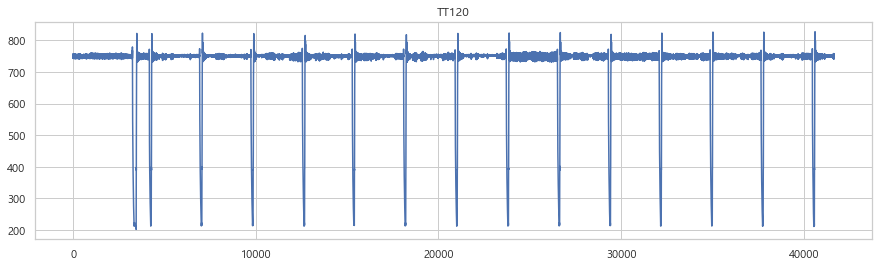

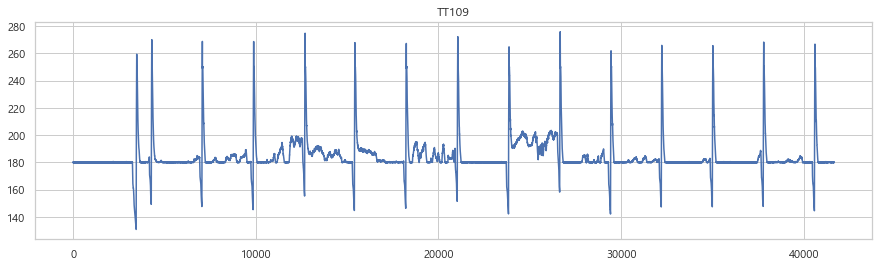

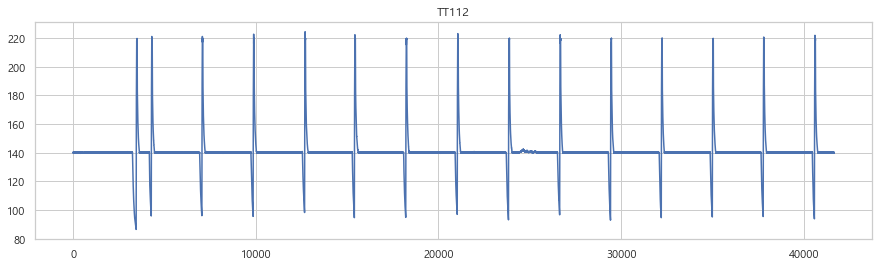

In [17]:
for i in var_list : 
    plt.figure(figsize=(15,4))
    plt.title('%s' %i)
    df[i].plot()
    plt.savefig('img/%s' %i)

In [18]:
var_list

['ACP', 'TT101', 'TT120', 'TT109', 'TT112']

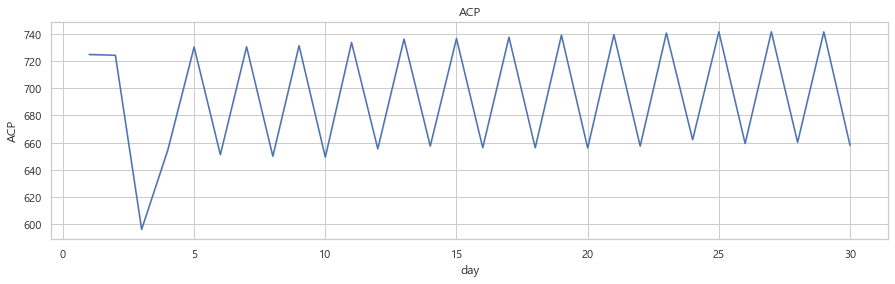

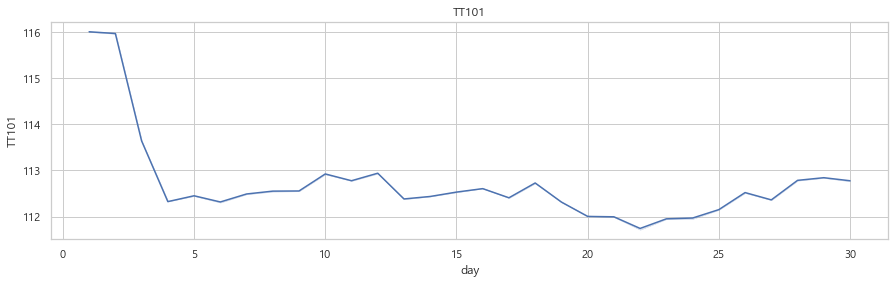

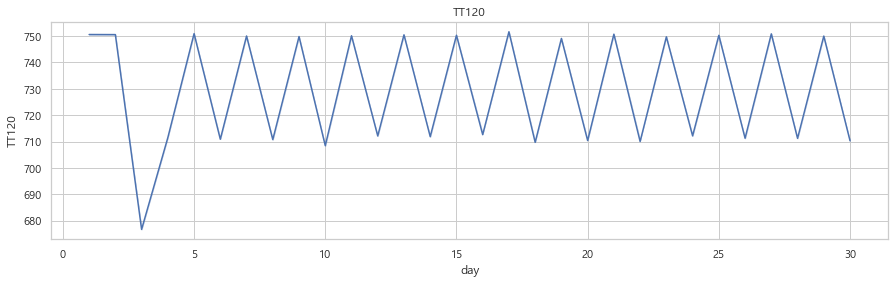

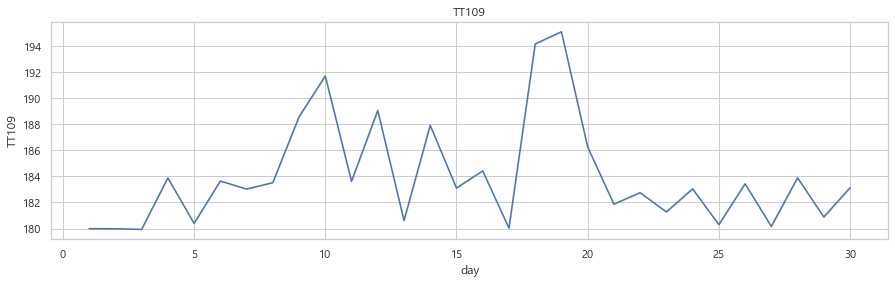

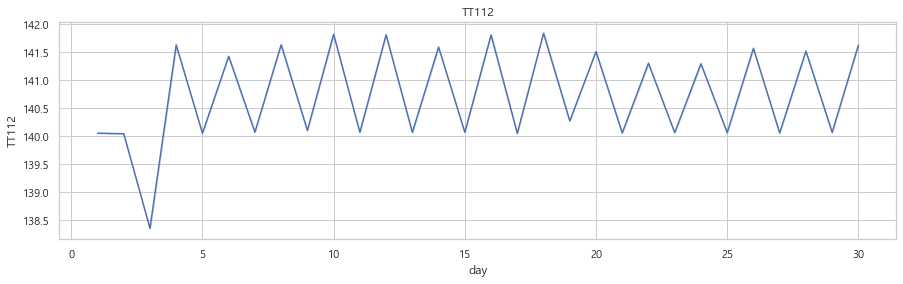

In [19]:
for i in var_list : 
    plt.figure(figsize=(15,4))
    plt.title('%s' %i)
    sns.lineplot(data=df, x='day', y=i, ci=0)
    plt.savefig('img/%s' %i)

<AxesSubplot:xlabel='hour', ylabel='ACP'>

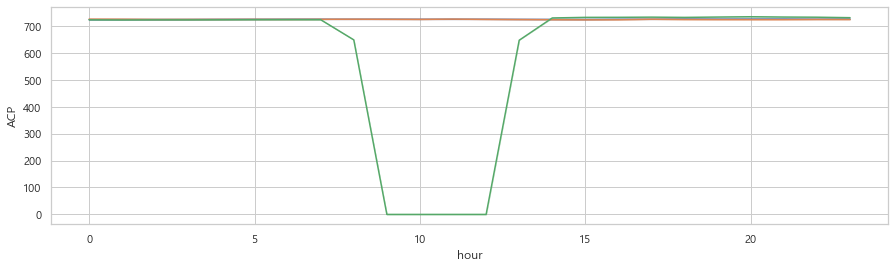

In [20]:
df_001 = df[df['day']==1]
df_002 = df[df['day']==2]
df_003 = df[df['day']==3]


sns.lineplot(data=df_001, x='hour', y='ACP', ci=0)
sns.lineplot(data=df_002, x='hour', y='ACP', ci=0)
sns.lineplot(data=df_003, x='hour', y='ACP', ci=0)

In [21]:
df_newset = df[['ACP', 'day', 'hour']]
df_newset.head()

,ACP,day,hour
0,723,1,0
1,724,1,0
2,724,1,1
3,723,1,1
4,724,1,1


In [22]:
var_list_2 = pd.read_csv('data/var_list.csv')
var_list_2 = var_list_2['var_name']
var_list_2.head(10)

0         ACP
1    TT Cogen
2       TT117
3       TT102
4       TT105
5       TT109
6       TT112
7       TT123
8       TT120
9       TT101
Name: var_name, dtype: object

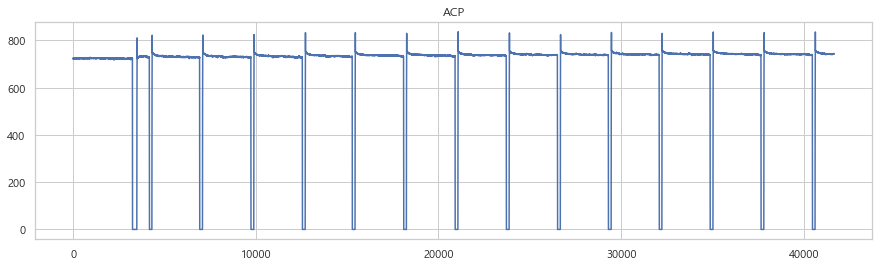

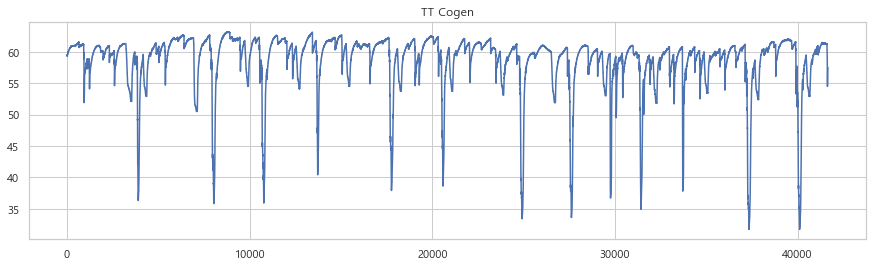

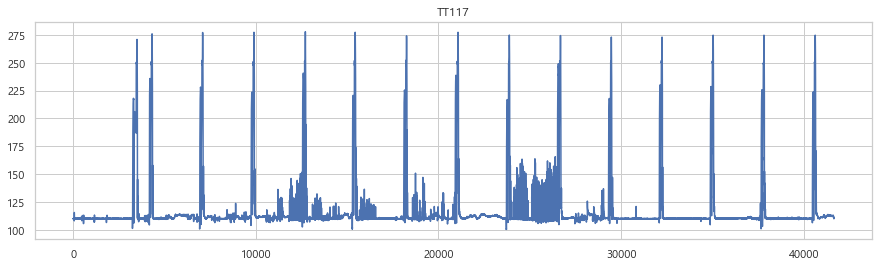

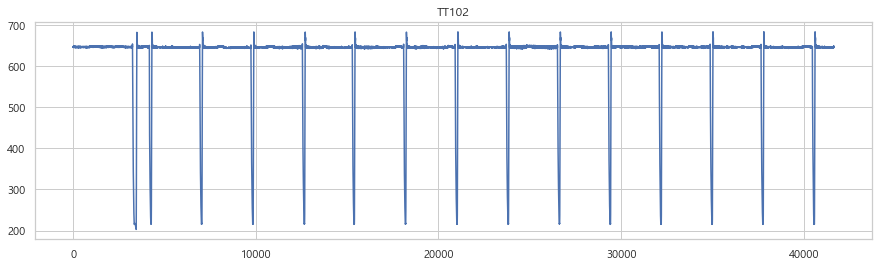

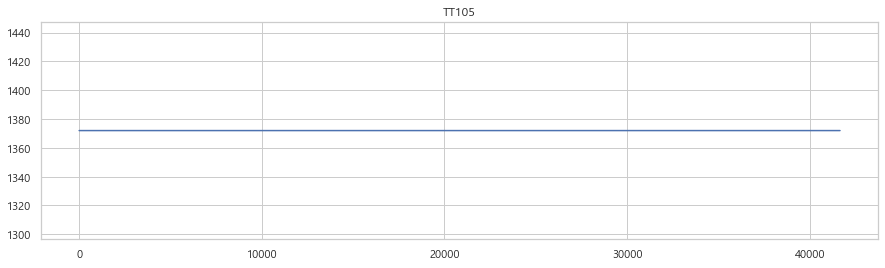

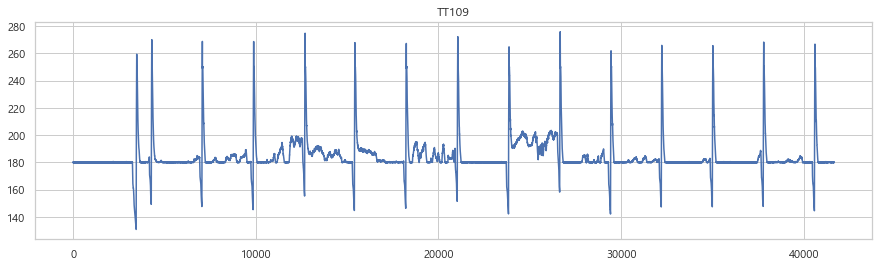

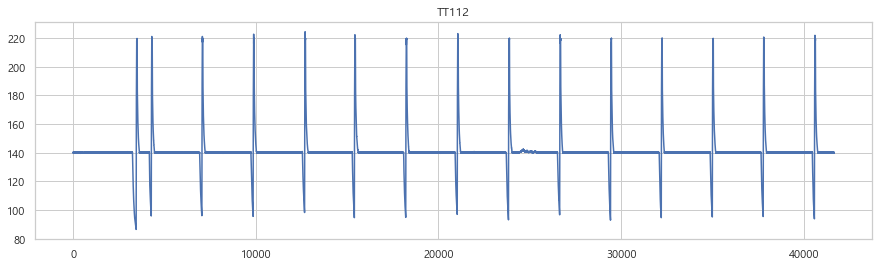

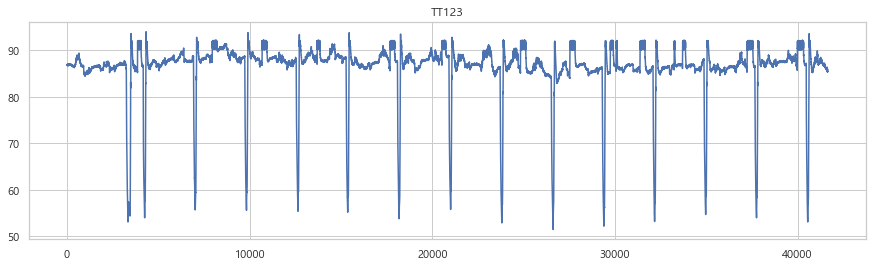

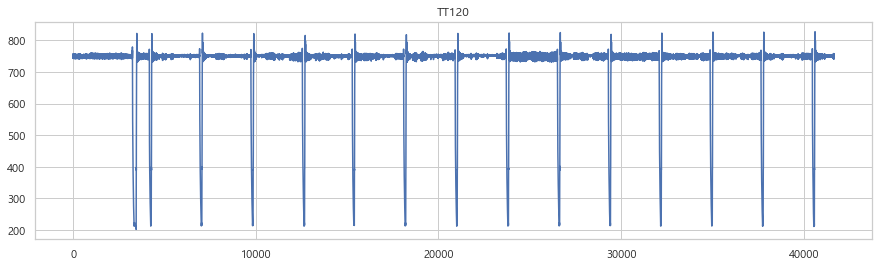

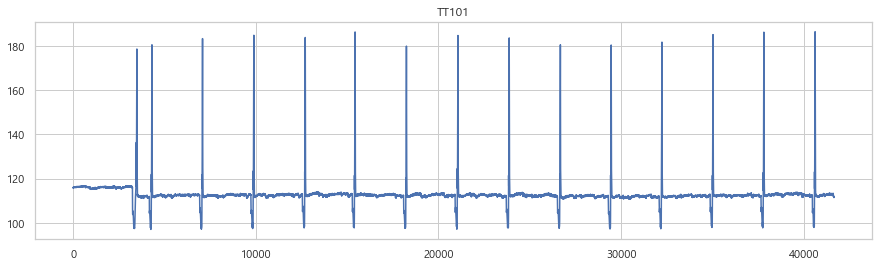

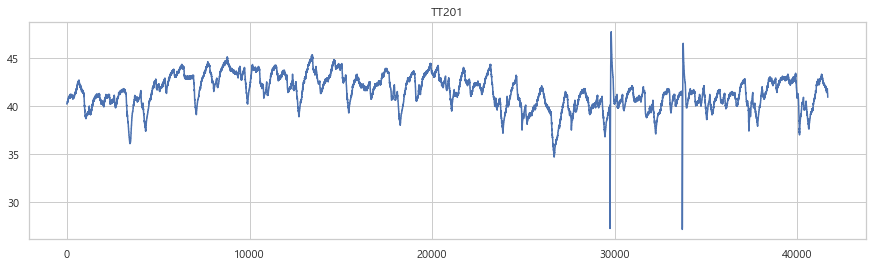

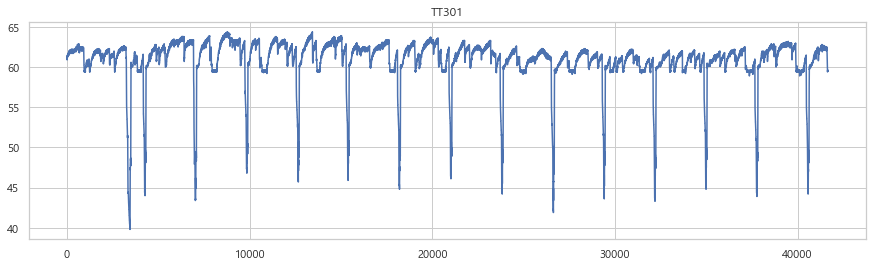

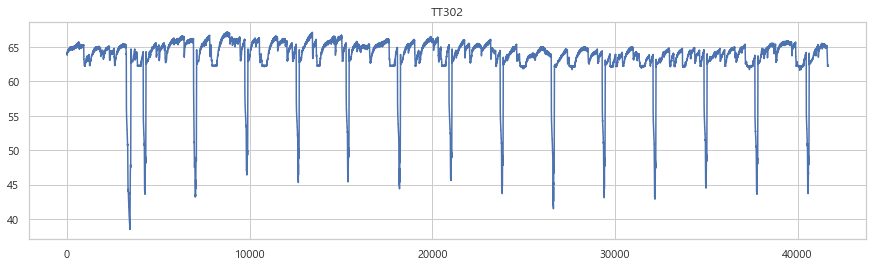

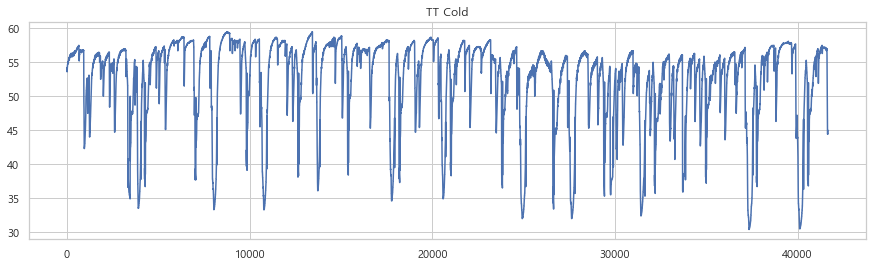

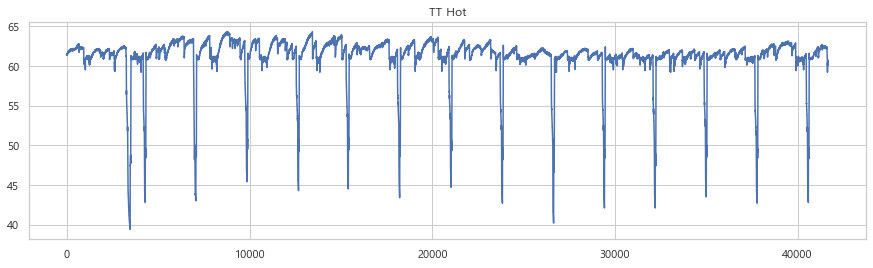

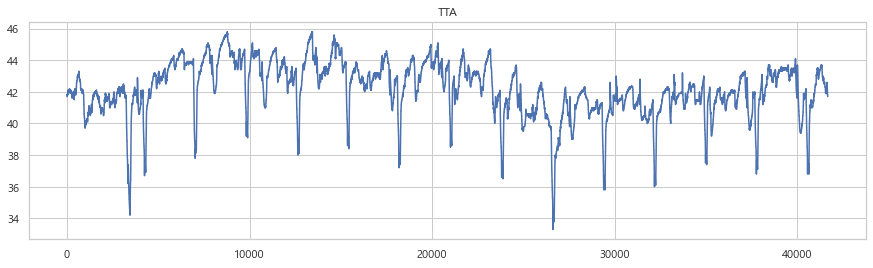

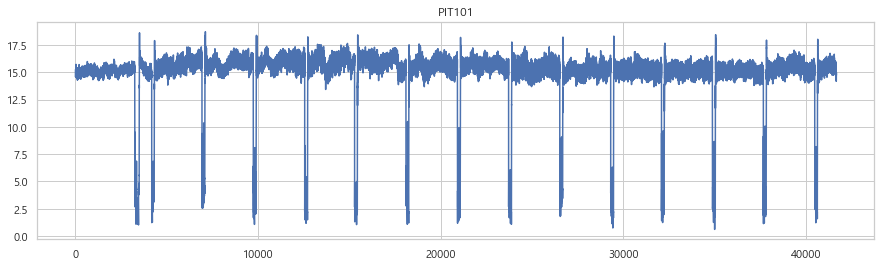

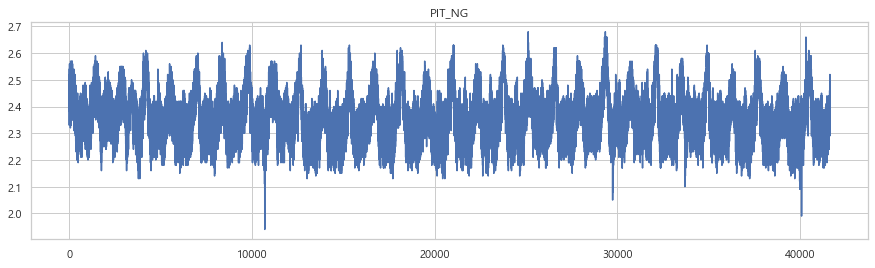

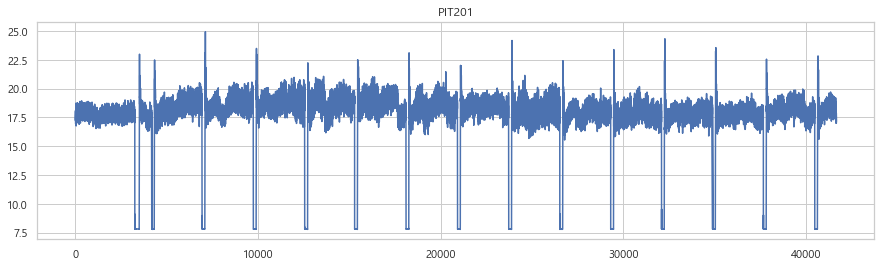

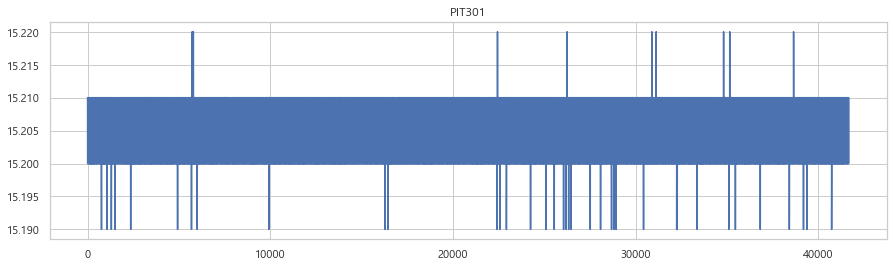

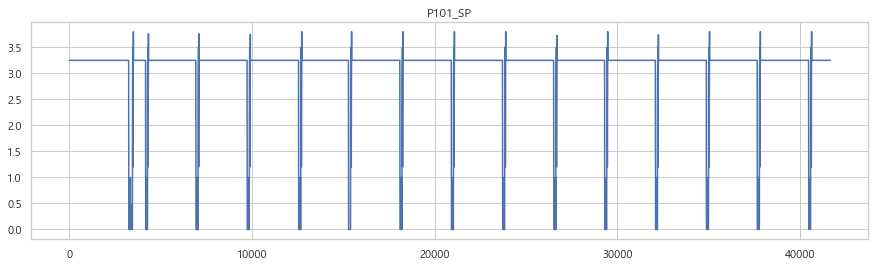

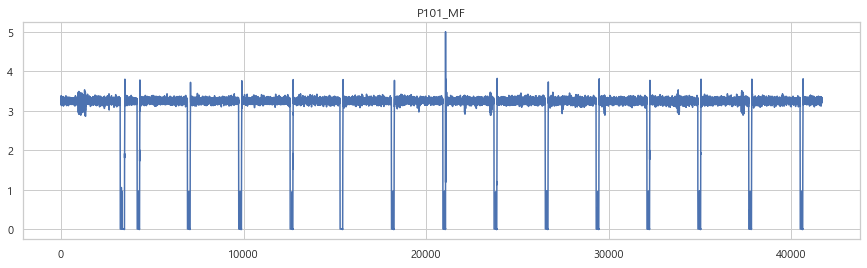

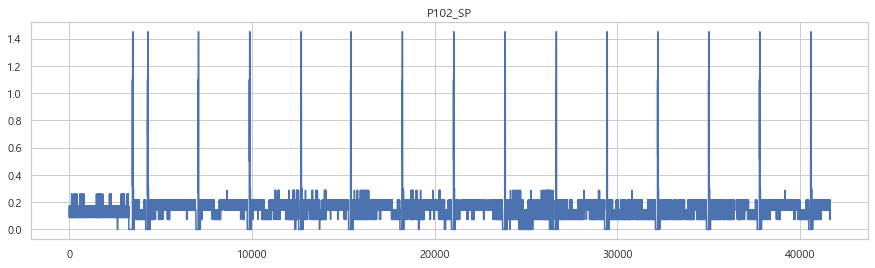

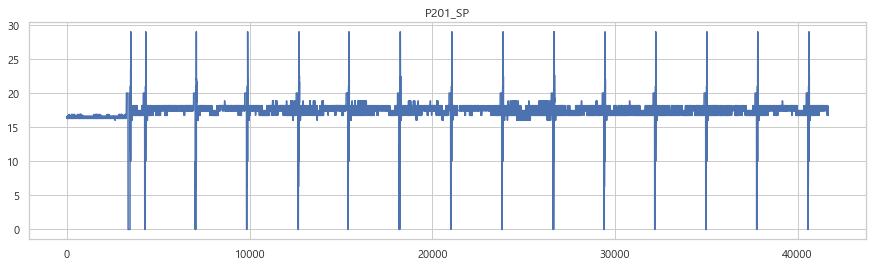

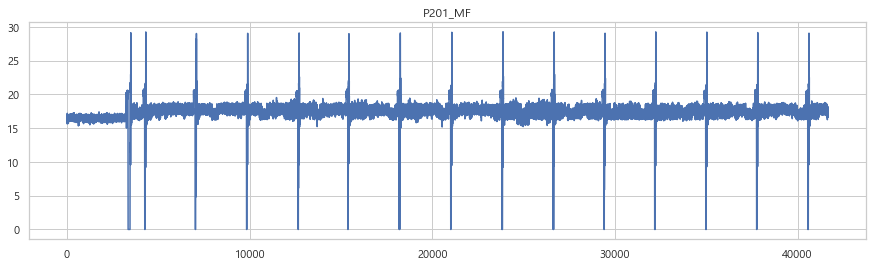

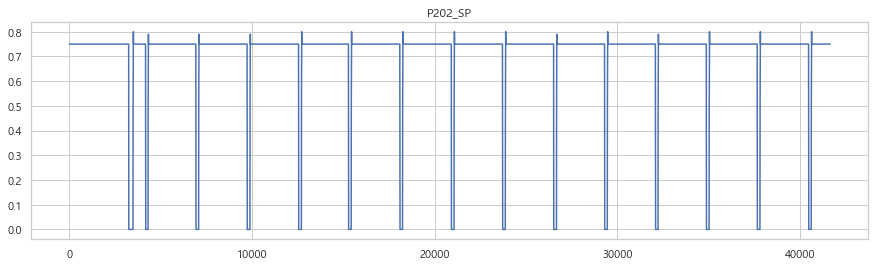

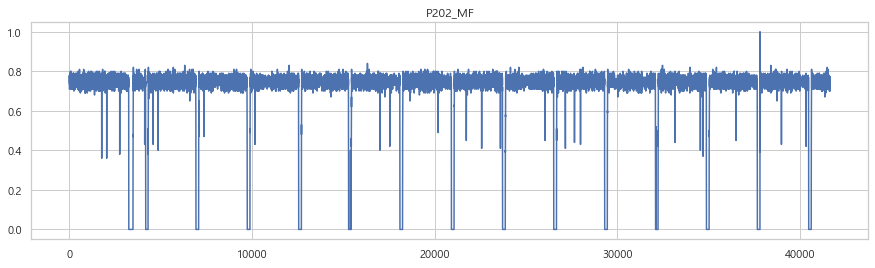

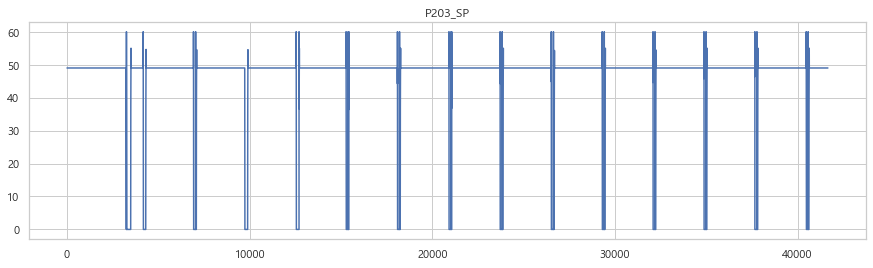

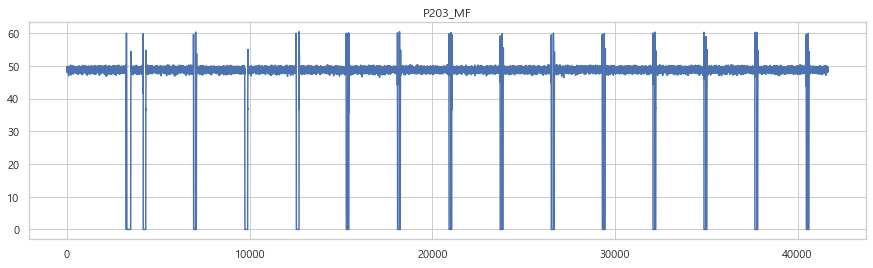

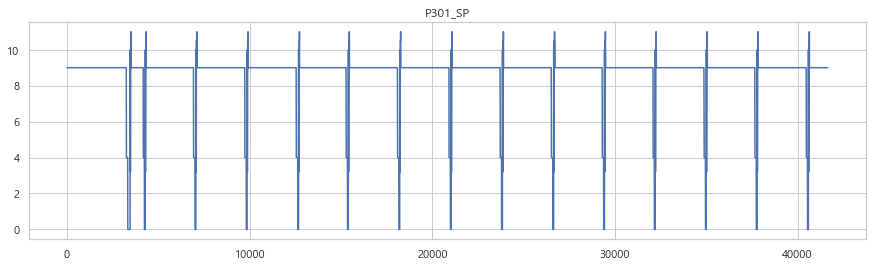

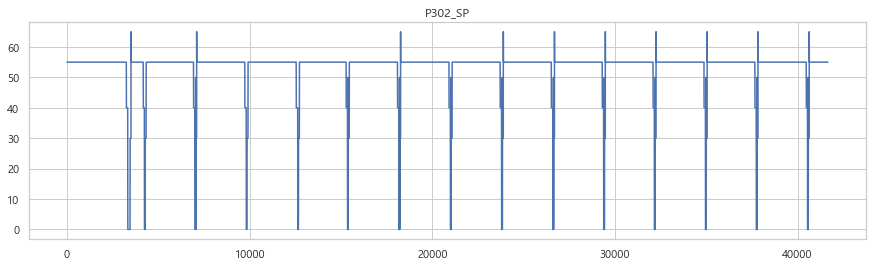

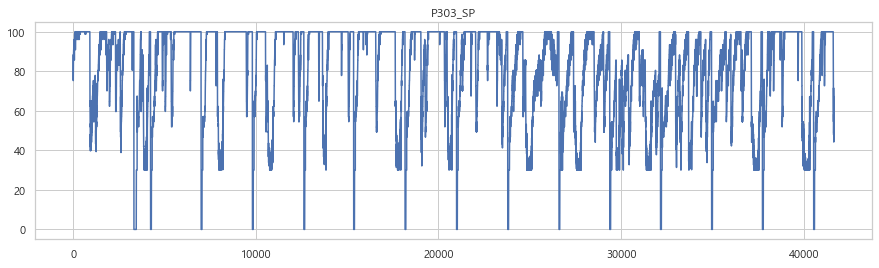

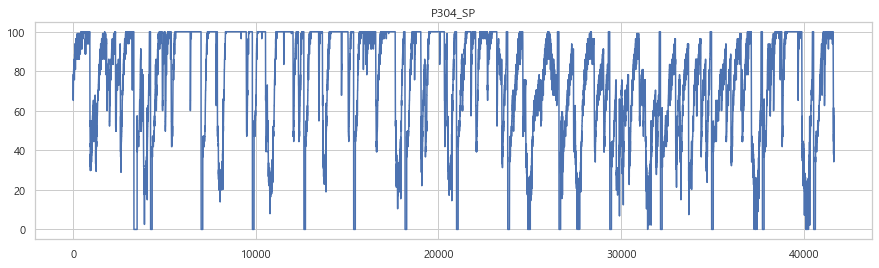

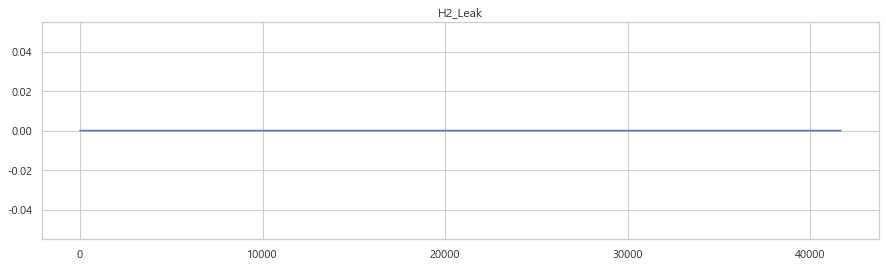

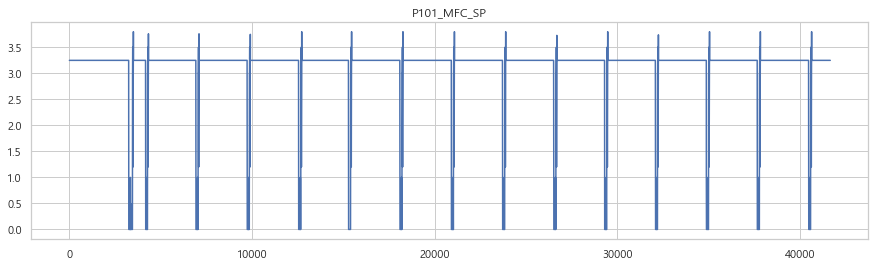

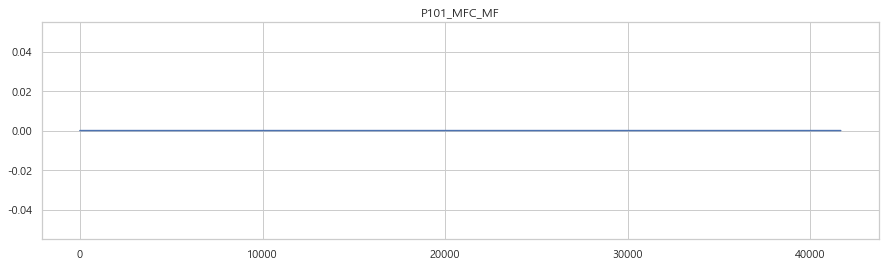

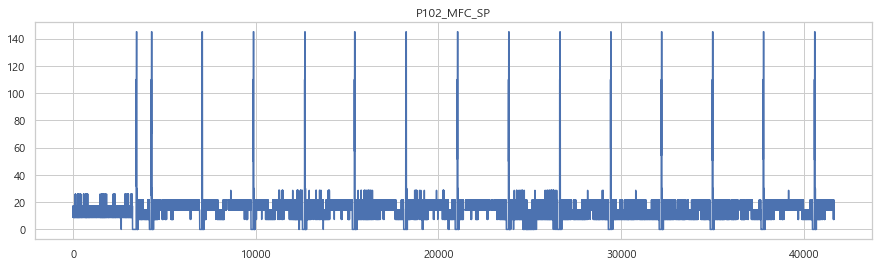

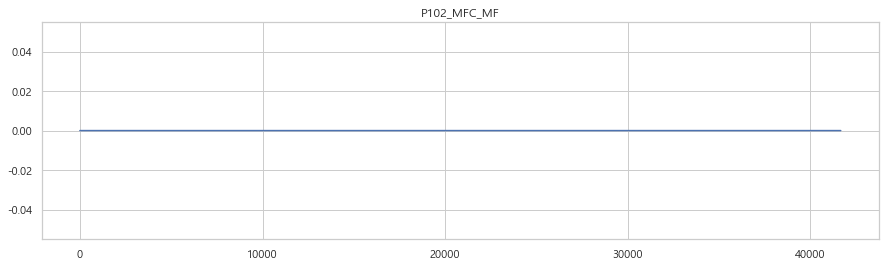

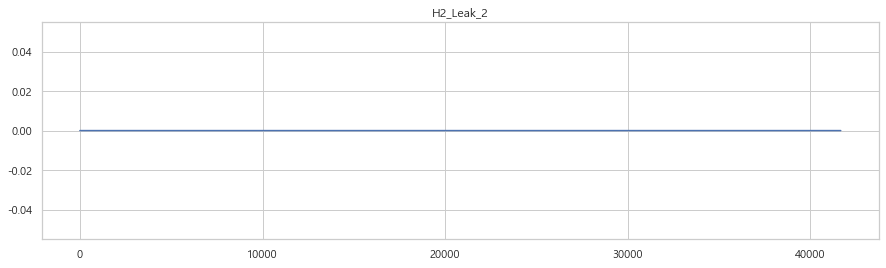

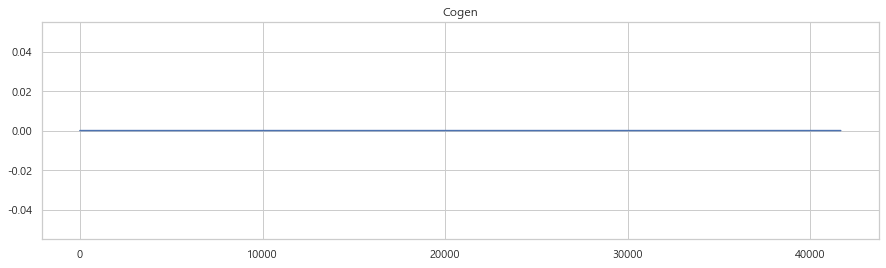

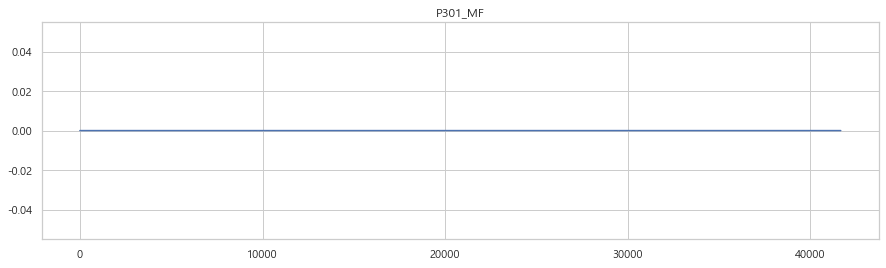

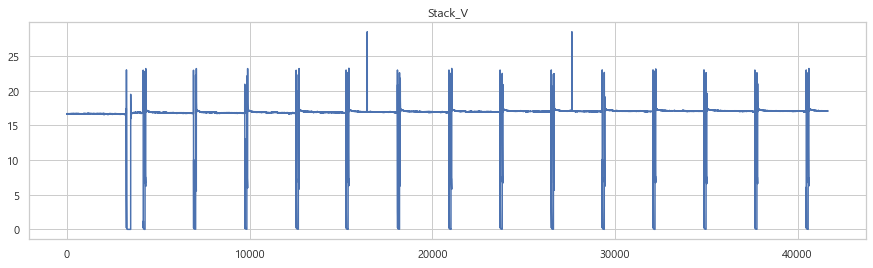

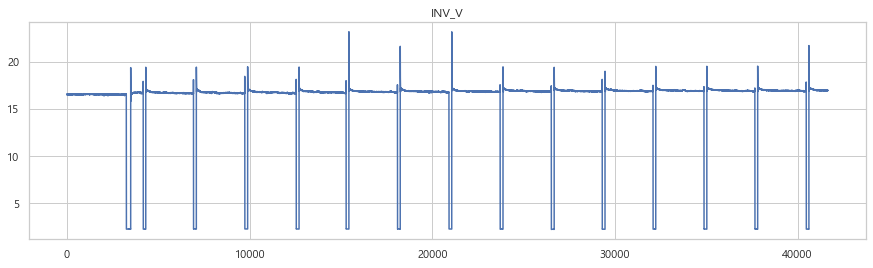

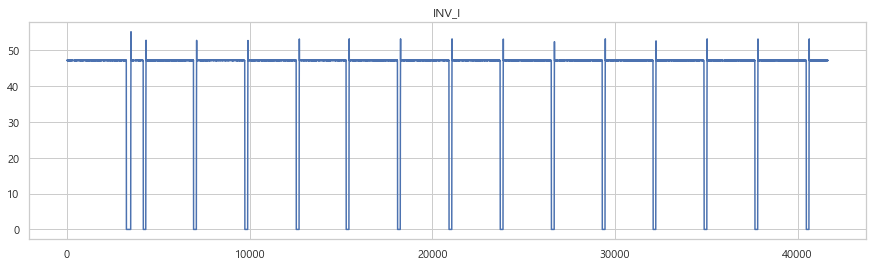

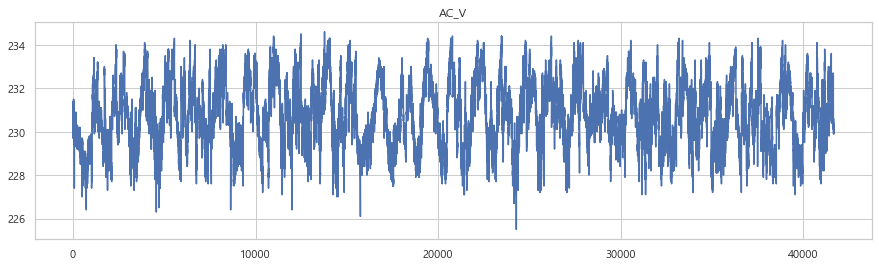

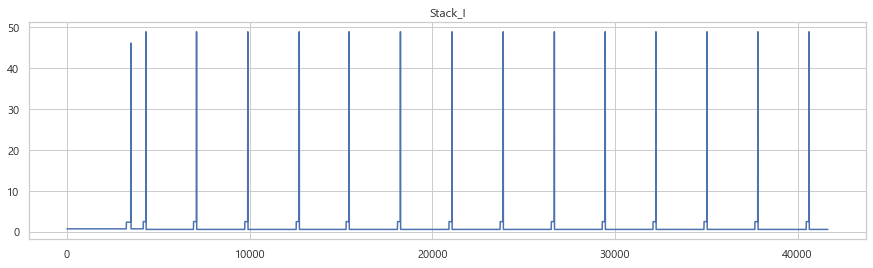

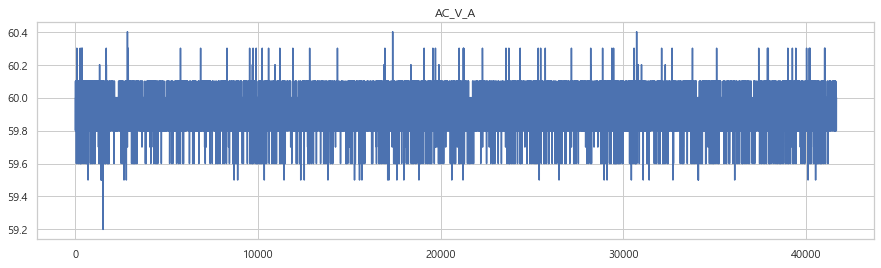

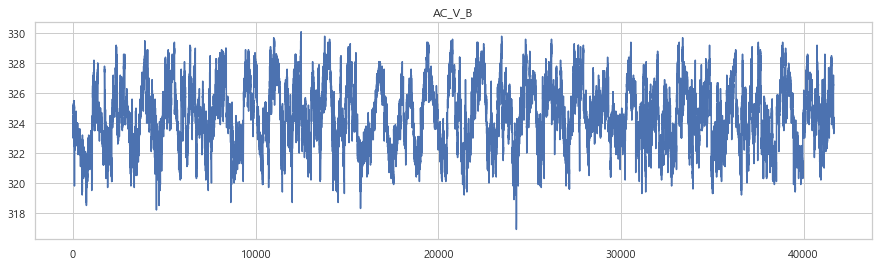

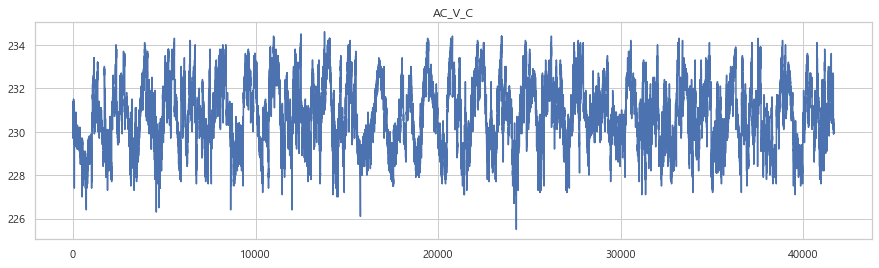

In [23]:
for i in var_list_2 : 
    plt.figure(figsize=(15,4))
    plt.title('%s' %i)
    df[i].plot()
    plt.savefig('img/%s' %i)

In [24]:
df.head()

,바인딩시간,장비번호,장비날짜,장비시간,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,S_Backflow,S_P301_F_Cnt,S_P203OL,equip_dt,year,month,day,hour,minute,second
0,20190901010002,10965,2019-09-01,0:58:19,0,2,723,59.3,4990,109.9,...,False,False,False,2019-09-01 00:58:19,2019,9,1,0,58,19
1,20190901010103,10965,2019-09-01,0:59:20,0,2,724,59.3,4990,109.9,...,False,False,False,2019-09-01 00:59:20,2019,9,1,0,59,20
2,20190901010204,10965,2019-09-01,1:00:21,0,2,724,59.3,4990,110.0,...,False,False,False,2019-09-01 01:00:21,2019,9,1,1,0,21
3,20190901010305,10965,2019-09-01,1:01:23,0,2,723,59.3,4990,110.1,...,False,False,False,2019-09-01 01:01:23,2019,9,1,1,1,23
4,20190901010401,10965,2019-09-01,1:02:19,0,2,724,59.3,4990,109.8,...,False,False,False,2019-09-01 01:02:19,2019,9,1,1,2,19


<AxesSubplot:xlabel='TT102', ylabel='TT120'>

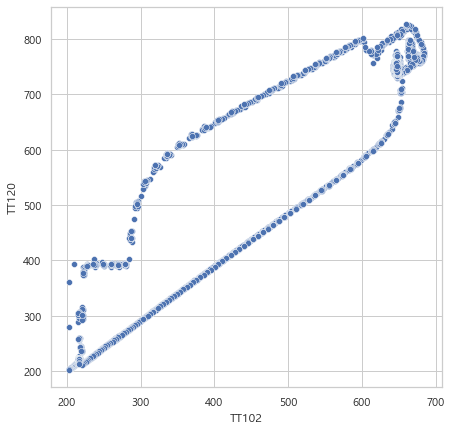

In [25]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='TT102', y='TT120')

<AxesSubplot:>

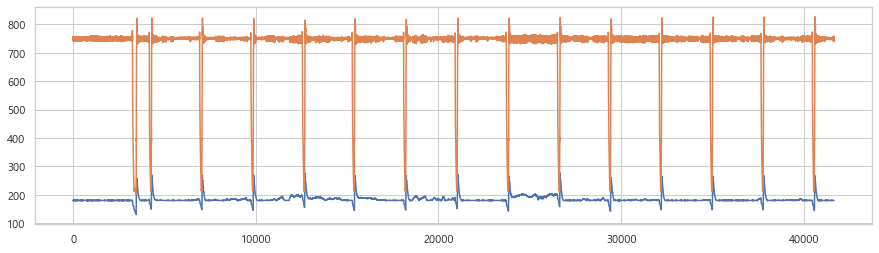

In [26]:
df['TT109'].plot()
df['TT120'].plot()

<AxesSubplot:xlabel='TT102', ylabel='TT120'>

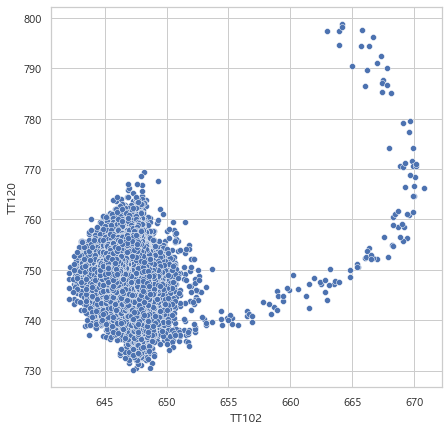

In [27]:
df_seq = df[df['Seq']== 4990]

plt.figure(figsize=(7,7))
sns.scatterplot(data=df_seq, x='TT102', y='TT120')

<AxesSubplot:>

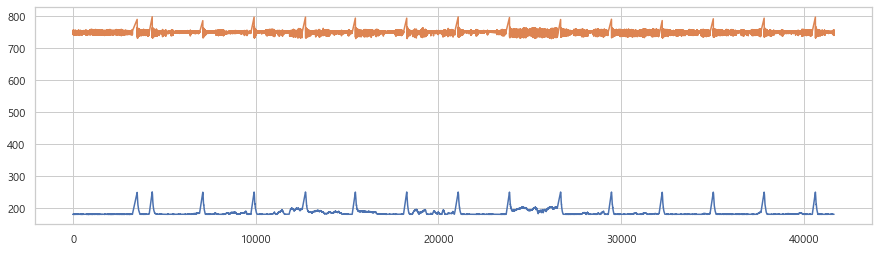

In [28]:
df_seq['TT109'].plot()
df_seq['TT120'].plot()

# 가나다라
## 가나다라 
#### <font color = 'blue'>가나다라

- 가
- 나 
- 다 

In [29]:
## ACP의 일별 평균/최소/최대값 구하기 
df.head()

,바인딩시간,장비번호,장비날짜,장비시간,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,S_Backflow,S_P301_F_Cnt,S_P203OL,equip_dt,year,month,day,hour,minute,second
0,20190901010002,10965,2019-09-01,0:58:19,0,2,723,59.3,4990,109.9,...,False,False,False,2019-09-01 00:58:19,2019,9,1,0,58,19
1,20190901010103,10965,2019-09-01,0:59:20,0,2,724,59.3,4990,109.9,...,False,False,False,2019-09-01 00:59:20,2019,9,1,0,59,20
2,20190901010204,10965,2019-09-01,1:00:21,0,2,724,59.3,4990,110.0,...,False,False,False,2019-09-01 01:00:21,2019,9,1,1,0,21
3,20190901010305,10965,2019-09-01,1:01:23,0,2,723,59.3,4990,110.1,...,False,False,False,2019-09-01 01:01:23,2019,9,1,1,1,23
4,20190901010401,10965,2019-09-01,1:02:19,0,2,724,59.3,4990,109.8,...,False,False,False,2019-09-01 01:02:19,2019,9,1,1,2,19


In [38]:
## 그룹바이 함수를 사용하여, ACP의 일자별 통계량 구하기 
df_ACP = df[['ACP', 'day']]
df_ACP.groupby('day').describe()

ACP                                                           
      count        mean         std    min    25%    50%    75%    max
day                                                                   
1    1348.0  724.938427    1.020171  721.0  724.0  725.0  726.0  728.0
2    1381.0  724.306300    1.157657  717.0  724.0  724.0  725.0  727.0
3    1353.0  596.170732  278.764226    0.0  722.0  724.0  732.0  811.0
4    1328.0  654.792169  227.190963    0.0  731.0  733.0  736.0  822.0
5    1399.0  730.403145    1.304396  723.0  730.0  730.0  731.0  734.0
6    1411.0  651.204819  231.857326    0.0  732.0  734.0  735.0  823.0
7    1395.0  730.559140    1.271549  726.0  730.0  731.0  731.0  733.0
8    1393.0  650.025126  234.831001    0.0  732.0  735.0  738.0  825.0
9    1424.0  731.398174    2.031937  724.0  730.0  732.0  733.0  736.0
10   1340.0  649.318657  238.836658    0.0  735.0  738.0  739.0  833.0
11   1394.0  733.692253    1.270058  729.0  733.0  734.0  735.0  738.0
12   1402.0  655.500000  232.498349    0.0  737.0  738.0  741.0  833.0
13   1408.0  736.252841    1.221109  731.0  736.0  736.0  737.0  740.0
14   1408.0  657.511364  231.647261    0.0  738.0  740.0  741.0  830.0
15   1410.0  736.664539    1.327315  730.0  736.0  737.0  738.0  739.0
16   1389.0  656.331893  233.818453    0.0  737.0  740.0  742.0  837.0
17   1415.0  737.637456    0.916228  733.0  737.0  738.0  738.0  740.0
18   1398.0  656.296853  236.624127    0.0  741.0  742.0  744.0  832.0
19   1404.0  739.142450    1.117320  733.0  738.0  739.0  740.0  742.0
20   1387.0  656.078587  238.276475    0.0  741.0  742.0  745.0  825.0
21   1395.0  739.501075    0.887805  735.0  739.0  740.0  740.0  742.0
22   1362.0  657.493392  236.866748    0.0  741.0  742.0  746.0  834.0
23   1422.0  740.731364    1.219528  736.0  740.0  741.0  741.0  744.0
24   1390.0  662.180576  232.568155    0.0  743.0  744.0  746.0  830.0
25   1399.0  741.625447    1.304152  736.0  741.0  741.0  742.0  747.0
26   1390.0  659.357554  236.767415    0.0  743.0  744.0  747.0  836.0
27   1395.0  741.594265    1.186471  738.0  741.0  742.0  742.0  745.0
28   1404.0  660.213675  234.236422    0.0  742.0  743.0  746.0  833.0
29   1406.0  741.573969    0.969208  736.0  741.0  742.0  742.0  744.0
30   1309.0  657.962567  237.128907    0.0  742.0  743.0  746.0  836.0

In [44]:
## 판다스로 피벗 테이블 만들기 

df_pivot = pd.pivot_table(df,            # 피벗할 데이터프레임
                     index = '바인딩시간',    # 행 위치에 들어갈 열
                     columns = 'day',    # 열 위치에 들어갈 열
                     values = 'ACP',     # 데이터로 사용할 열
                     aggfunc = ['mean', 'min', 'max'])   # 데이터 집계함수
df_pivot

mean                                      ... max          \
day                1   2   3   4   5   6   7   8   9   10  ...  21  22  23   
바인딩시간                                                      ...               
20190901010002  723.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   
20190901010103  724.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   
20190901010204  724.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   
20190901010305  723.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   
20190901010401  724.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   
...               ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..   
20190930225504    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   
20190930225605    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   
20190930225701    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   
20190930225802    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   
20190930225904    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   

                                               
day             24  25  26  27  28  29     30  
바인딩시간                                          
20190901010002 NaN NaN NaN NaN NaN NaN    NaN  
20190901010103 NaN NaN NaN NaN NaN NaN    NaN  
20190901010204 NaN NaN NaN NaN NaN NaN    NaN  
20190901010305 NaN NaN NaN NaN NaN NaN    NaN  
20190901010401 NaN NaN NaN NaN NaN NaN    NaN  
...             ..  ..  ..  ..  ..  ..    ...  
20190930225504 NaN NaN NaN NaN NaN NaN  744.0  
20190930225605 NaN NaN NaN NaN NaN NaN  743.0  
20190930225701 NaN NaN NaN NaN NaN NaN  743.0  
20190930225802 NaN NaN NaN NaN NaN NaN  743.0  
20190930225904 NaN NaN NaN NaN NaN NaN  743.0  

[41659 rows x 90 columns]